In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pyagrum as gum
import pyagrum.lib.notebook as gnb

import sys, os
root_dir = os.path.abspath("..")
if root_dir not in sys.path:
    sys.path.append(root_dir)

from fci import *
import pandas as pd

from IPython.display import display, Markdown

In [6]:
bn = gum.loadBN("instances/bn-10n-10a-2.bif")
bn

(pyagrum.BayesNet@0x12cbe6a00) BN{nodes: 10, arcs: 10, domainSize: 36864, dim: 84, mem: 984o}

In [7]:
from tqdm import tqdm
for i in tqdm(range(10)):
    gum.generateSample(bn, 1_000_000, f"data/bn-10n-10a-2-test{i+1}.csv")

100%|███████████████████████████████████████████| 10/10 [00:32<00:00,  3.27s/it]


CPU times: user 2.27 s, sys: 179 ms, total: 2.45 s
Wall time: 478 ms
CPU times: user 1.19 s, sys: 88.2 ms, total: 1.28 s
Wall time: 174 ms


## Results of the data/bn-10n-10a-1-test10.csv

### Markov equivalence class (PAG)

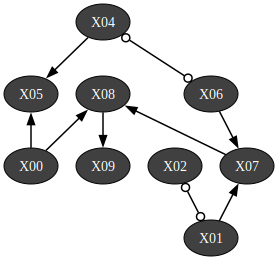

### Causal differences

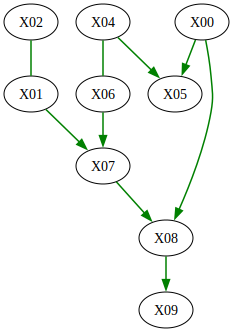

CPU times: user 2.16 s, sys: 177 ms, total: 2.33 s
Wall time: 333 ms
CPU times: user 1.08 s, sys: 81.6 ms, total: 1.17 s
Wall time: 147 ms


## Results of the data/bn-10n-10a-1-test8.csv

### Markov equivalence class (PAG)

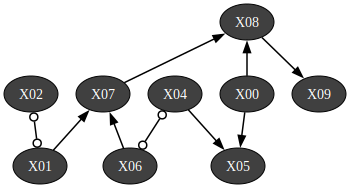

### Causal differences

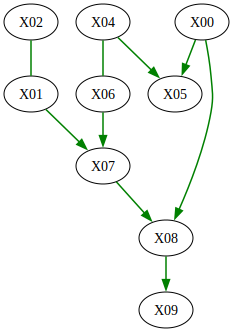

CPU times: user 2.4 s, sys: 179 ms, total: 2.57 s
Wall time: 611 ms
CPU times: user 1.26 s, sys: 93.7 ms, total: 1.35 s
Wall time: 377 ms


## Results of the data/bn-10n-10a-1-test9.csv

### Markov equivalence class (PAG)

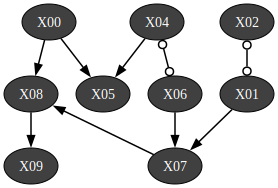

### Causal differences

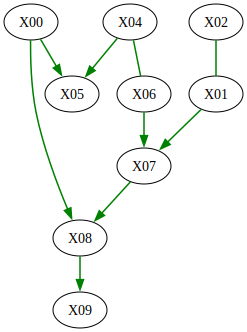

CPU times: user 2.05 s, sys: 166 ms, total: 2.22 s
Wall time: 306 ms
CPU times: user 923 ms, sys: 67.4 ms, total: 990 ms
Wall time: 138 ms


## Results of the data/bn-10n-10a-1-test7.csv

### Markov equivalence class (PAG)

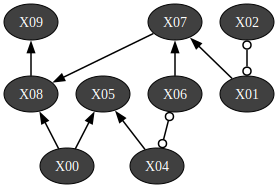

### Causal differences

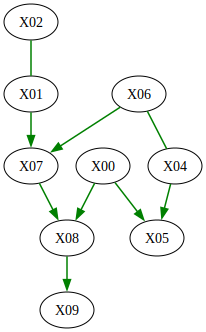

CPU times: user 2.35 s, sys: 177 ms, total: 2.53 s
Wall time: 651 ms
CPU times: user 1.01 s, sys: 75.2 ms, total: 1.08 s
Wall time: 336 ms


## Results of the data/bn-10n-10a-1-test6.csv

### Markov equivalence class (PAG)

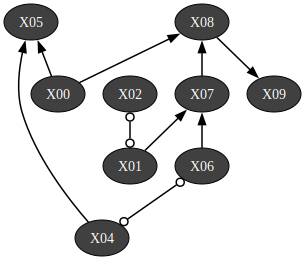

### Causal differences

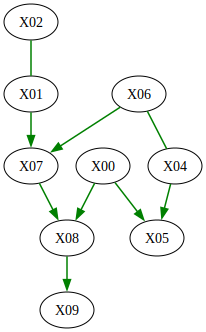

CPU times: user 1.97 s, sys: 158 ms, total: 2.13 s
Wall time: 278 ms
CPU times: user 900 ms, sys: 57 ms, total: 957 ms
Wall time: 116 ms


## Results of the data/bn-10n-10a-1-test4.csv

### Markov equivalence class (PAG)

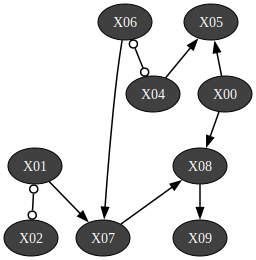

### Causal differences

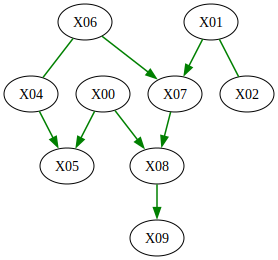

CPU times: user 2.4 s, sys: 185 ms, total: 2.59 s
Wall time: 779 ms
CPU times: user 1.67 s, sys: 121 ms, total: 1.8 s
Wall time: 634 ms


## Results of the data/bn-10n-10a-1-test5.csv

### Markov equivalence class (PAG)

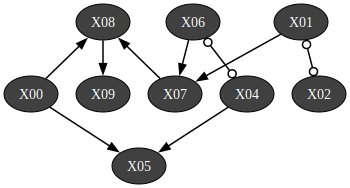

### Causal differences

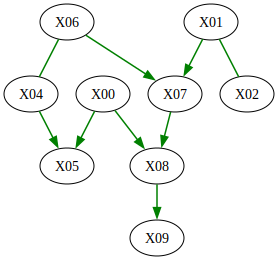

CPU times: user 2.33 s, sys: 180 ms, total: 2.51 s
Wall time: 655 ms
CPU times: user 1.41 s, sys: 98.6 ms, total: 1.51 s
Wall time: 275 ms


## Results of the data/bn-10n-10a-1-test1.csv

### Markov equivalence class (PAG)

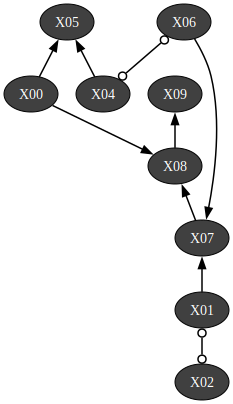

### Causal differences

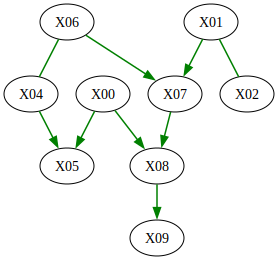

CPU times: user 2.21 s, sys: 167 ms, total: 2.38 s
Wall time: 263 ms
CPU times: user 951 ms, sys: 69.3 ms, total: 1.02 s
Wall time: 112 ms


## Results of the data/bn-10n-10a-1-test2.csv

### Markov equivalence class (PAG)

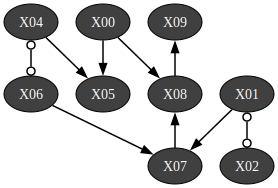

### Causal differences

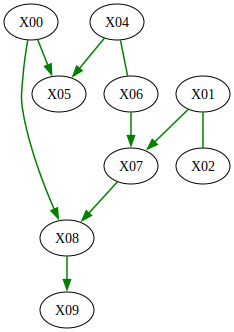

CPU times: user 2.22 s, sys: 166 ms, total: 2.39 s
Wall time: 262 ms
CPU times: user 965 ms, sys: 72 ms, total: 1.04 s
Wall time: 114 ms


## Results of the data/bn-10n-10a-1-test3.csv

### Markov equivalence class (PAG)

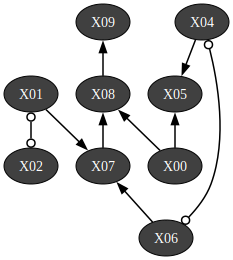

### Causal differences

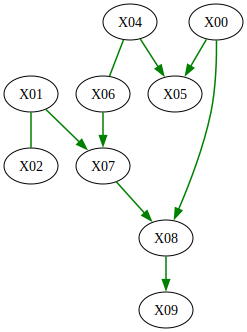

In [8]:
from pathlib import Path

for name in Path("data/").glob("bn-10n-10a-1-test*"):
    df = pd.read_csv(name)
    df = df.drop(["X03"], axis=1)

    learner = gum.BNLearner(df)
    learner.useMIIC()
    
    %time gumPDAG = learner.learnPDAG()
    %time pag, _ = fci(learner, ruleVerbose=False)

    display(
        Markdown(f"## Results of the {name}"),
        Markdown("### Markov equivalence class (PAG)"),
        toDot(pag),
        Markdown("### Causal differences"),
        showCausalDifferences(pag, gumPDAG, learner.names())
    )